###Ricco Vasconcellos Constante Soares

###00307968

In [4]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

#Reading and manipulating the dataset

In [5]:
filepth = "./breast_cancer_data.csv"
dataset = pd.read_csv(filepth)
#ignoring the ID column
dataset = dataset.iloc[:,1:]

In [6]:
dataset

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [7]:
dataset['target']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64

In [8]:
positiveInstances = dataset.query('target == 1')
negativeInstances = dataset.query('target == 0')

In [9]:
print("Positive instances:", len(positiveInstances)/len(dataset))
print("Negative instances:", len(negativeInstances)/len(dataset))

Positive instances: 0.37258347978910367
Negative instances: 0.6274165202108963


#Normalizing Data

In [10]:
def normalize(dataset):
  return np.divide(dataset, dataset.max())

In [11]:
normDataset = normalize(dataset)

In [12]:
normDataset

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,target
0,0.639986,0.264257,0.651459,0.400240,0.724602,0.803706,0.703140,0.731113,0.795724,0.807779,...,0.349818,0.734873,0.474612,0.728661,0.629112,0.568610,0.912027,0.693130,0.573012,1.0
1,0.731768,0.452393,0.705040,0.530188,0.518605,0.227678,0.203608,0.348757,0.596053,0.581589,...,0.472547,0.632166,0.459803,0.556155,0.176371,0.192971,0.639175,0.414281,0.429012,1.0
2,0.700462,0.540988,0.689655,0.481008,0.670747,0.462942,0.462512,0.635686,0.680592,0.615661,...,0.515341,0.607086,0.401740,0.648697,0.401229,0.359744,0.835052,0.544290,0.422072,1.0
3,0.406261,0.518839,0.411565,0.154378,0.872093,0.821946,0.565604,0.522863,0.854276,1.000000,...,0.534921,0.393591,0.133451,0.942498,0.818809,0.548642,0.884880,1.000000,0.833735,1.0
4,0.721807,0.365071,0.716711,0.518593,0.613831,0.384482,0.463918,0.518390,0.595066,0.603756,...,0.336496,0.605892,0.370240,0.617251,0.193762,0.319489,0.558419,0.356131,0.370024,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.766987,0.570010,0.753316,0.591363,0.679315,0.335553,0.571462,0.690358,0.567763,0.577073,...,0.532903,0.661226,0.476493,0.633423,0.199716,0.328035,0.761512,0.310334,0.342892,1.0
565,0.716115,0.719196,0.696021,0.504198,0.598531,0.299363,0.337395,0.486630,0.576316,0.567837,...,0.772103,0.617038,0.406911,0.523810,0.181664,0.256789,0.559450,0.387466,0.319855,1.0
566,0.590537,0.714868,0.574536,0.343103,0.517442,0.296178,0.216753,0.263519,0.523026,0.579639,...,0.688736,0.504379,0.264222,0.511680,0.292439,0.271805,0.487285,0.334137,0.376867,1.0
567,0.732835,0.746690,0.743236,0.505798,0.720930,0.801969,0.823336,0.755467,0.788487,0.720033,...,0.795721,0.734873,0.428068,0.741240,0.820510,0.749760,0.910653,0.615697,0.597590,1.0


#Train-Test Split

In [13]:
def trainTestSplit(dataset, posInstances, negInstances, trainProp):
  trainInstances = pd.DataFrame()

  trainPosNum = int(trainProp*len(posInstances))
  trainPosInstances = posInstances.sample(n=trainPosNum)

  trainNegNum = int(trainProp*len(negInstances))
  trainNegInstances = negInstances.sample(n=trainNegNum)

  trainInstances = pd.concat([trainPosInstances, trainNegInstances])
  testInstances = pd.concat([trainInstances, dataset]).drop_duplicates(keep=False)

  return trainInstances, testInstances



In [14]:
trainInstances, testInstances = trainTestSplit(dataset, positiveInstances, negativeInstances, 0.8)
print("")
print("Training Set Instances: ", len(trainInstances))
print("Positive Instances: ", len(trainInstances.query('target==1')))
print("Negative Instances: ", len(trainInstances.query('target==0')))
print("")
print("Test Set Instances: ", len(testInstances))
print("Positive Instances: ", len(testInstances.query('target==1')))
print("Negative Instances: ", len(testInstances.query('target==0')))


Training Set Instances:  454
Positive Instances:  169
Negative Instances:  285

Test Set Instances:  115
Positive Instances:  43
Negative Instances:  72


In [15]:
xTrain = trainInstances.iloc[:,:-1]
yTrain = trainInstances.iloc[:,-1:]

xTest = testInstances.iloc[:,:-1]
yTest = testInstances.iloc[:,-1:]

print("Train: ", xTrain.shape, yTrain.shape)
print("Test: ", xTest.shape, yTest.shape)

Train:  (454, 30) (454, 1)
Test:  (115, 30) (115, 1)


KNN

In [16]:
def majority(array):
  posCount = sum(array)
  return int(posCount > len(array)/2)


In [17]:
def euclidianDistance(fstCoordinates, scndCoordinates):
  assert len(fstCoordinates) == len(scndCoordinates)
  sum = 0
  for i in range(len(fstCoordinates)):
    sum += pow((fstCoordinates[i] - scndCoordinates[i]), 2)
  return pow(sum, 1/2)


In [18]:
def knn(n, testSet, trainSet):
  assert n <= len(trainSet)
  classifications = []
  xTest = testInstances.iloc[:,:-1]
  yTest = testInstances.iloc[:,-1:]
  for instance in testSet:
    distances = []
    for i in range(len(trainSet)):
      distances.append(euclidianDistance(instance, trainSet[i][0:30]))
    sortedDistances = sorted(distances)
    sortedNeighbors = []
    
    for x in range(len(sortedDistances)):
      for y in range(len(distances)):
        if sortedDistances[x] == distances[y]:
            sortedNeighbors.append(trainSet[y])

    yNeighbors = np.asarray(sortedNeighbors)[:,-1]
    chosen = yNeighbors[:n][:]
    classifications.append(majority(chosen))
  return classifications

In [19]:
def calcAccuracy(classifications, yValidation):
  assert len(classifications) == len(yValidation)
  correct = 0
  for i in range(len(classifications)):
    if classifications[i] == yValidation[i]:
      correct+=1
  return correct/len(classifications)


In [20]:
testPreds = knn(3, xTest.values, trainInstances.values)
print(calcAccuracy(testPreds, yTest.values))

0.8956521739130435


#Estimating a good K value

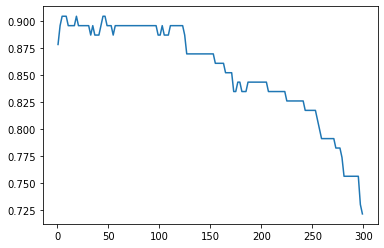

In [21]:
kValues = [i for i in range(1, 301, 2)]
results = []
for k in kValues:
  pred = knn(k, xTest.values, trainInstances.values)
  results.append(calcAccuracy(pred, yTest.values))
plt.plot(kValues, results)
plt.show()

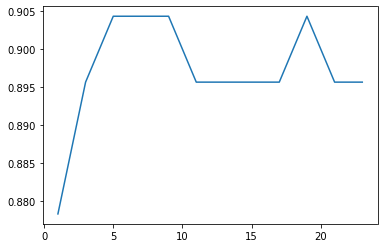

In [22]:
kValues = [i for i in range(1, 25, 2)]
results = []
for k in kValues:
  pred = knn(k, xTest.values, trainInstances.values)
  results.append(calcAccuracy(pred, yTest.values))
plt.plot(kValues, results)
plt.show()

#Verifying effects of normalization

In [ ]:
xNormTest = normalize(xTest)
normTrainInstances = normalize(trainInstances)
normPreds = knn(3, xNormTest.values, normTrainInstances.values)
print("Not normalized data accuracy: ", calcAccuracy(testPreds, yTest.values))
print("Normalized data accuracy: ", calcAccuracy(normPreds, yTest.values))

Not normalized data accuracy:  0.9130434782608695
Normalized data accuracy:  0.9217391304347826


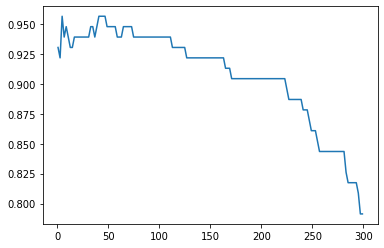

In [ ]:
kValues = [i for i in range(1, 301, 2)]
results = []
for k in kValues:
  pred = knn(k, xNormTest.values, normTrainInstances.values)
  results.append(calcAccuracy(pred, yTest.values))
plt.plot(kValues, results)
plt.show()

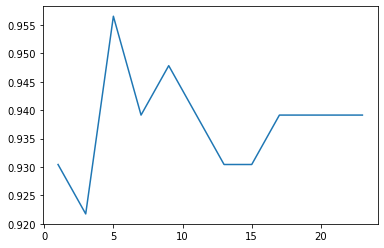

In [ ]:
kValues = [i for i in range(1, 25, 2)]
results = []
for k in kValues:
  pred = knn(k, xNormTest.values, normTrainInstances.values)
  results.append(calcAccuracy(pred, yTest.values))
plt.plot(kValues, results)
plt.show()

###Checking the difference between min and max values for each column

In [28]:
diff = []
for column in dataset:
  diff.append(dataset[column].max() - dataset[column].min())
dFrame = pd.DataFrame(data=diff)
print(dFrame)

              0
0     21.129000
1     29.570000
2    144.710000
3   2357.500000
4      0.110770
5      0.326020
6      0.426800
7      0.201200
8      0.198000
9      0.047480
10     2.761500
11     4.524800
12    21.223000
13   535.398000
14     0.029417
15     0.133148
16     0.396000
17     0.052790
18     0.071068
19     0.028945
20    28.110000
21    37.520000
22   200.790000
23  4068.800000
24     0.151430
25     1.030710
26     1.252000
27     0.291000
28     0.507300
29     0.152460
30     1.000000


#Answering the proposed questions

Observe o intervalo em que varia cada atributo no dado de treinamento:
há uma grande diferença entre os valores máximo e mínimo de cada
atributo? 

- A diferença entre os valores máximo e mínimo de cada atributo variam muito consideravelmente, com atributos que apresentam variação da ordem de grandeza de 10^(-2), enquanto outros, da ordem de 10^3.

Discuta brevemente sobre a distribuição de valores e como
isto pode impactar no processo de tomada de decisão do modelo

- A presença de descrepâncias nas variações de cada atributo do conjunto de dados tende a produzir piores resultados na classificação, uma vez que faz com que os atributos que apresentam maior variação dos valores adiquiram maior peso. É justamente por isso que é ideal realizar a normalização dos dados antes da aplicação do algoritmo de KNN.

Faça uma avaliação do resultado, brevemente discutindo os achados e
se existe alguma tendência ou associação entre desempenho e valor
de k.

- O valor de k decresce de forma praticamente constante conforme o valor de k cresce para valores de k maiores que 10. Para valores muito altos, é esperado que a classificação piore consideravelmente, uma vez que o classificador passa a classificar a maior parte das instâncias como pertencentes à classe majoritária.

Analise e comente se houveram ou não diferenças em relação à taxa de
acerto do algoritmo treinado e testado com dados não normalizados. A
normalização impactou? De que forma: melhorando ou piorando o
desempenho? Esta tendência foi observada para todos os valores de k?

- A diferença de desempenho entre os resultados obtidos com e sem normalização é nítida. Para os melhores resultados, observa-se uma melhoria de cerca de 5,56% com a utilização da normalização. O decaimento de acurácia com o crescimento do valor de k teve um comportamento semelhante nos dois casos, mas a acurácia diminuiu até valores proporcionalmente menores no caso em que os dados não foram normalizados.